In [1]:
# ret_apr = (((116557.57 + (5929.68 -5839.47)))/115521.49) /100    
# # axis show 0 and 100k more labels for y axis 
# # mre explicit, this is july 2022 till 
# # df.tail(5)
# # emphasis 9n the start of the investment , and also end of each month 

In [1]:
%run _22_tbls.py


 ATTN !! _22_ LEDGER EXPORTED _df_costs_1_2_complete_LEDGER.pkl


BROCKAGE COSTS till 2022-07-01 are $ 606



Type 'cd' for today's date or 'pd' for the past adjusted date or the last day of the month:  pd
Enter the number of months ago:  1


Selected cutoff date: 2024-04-30
2024-04-30 00:00:00
2024-04-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-03-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-02-29
- - - - - - - - - - - - - > LEDGER PROCESSED
2024-01-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-12-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-11-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-10-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-09-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-08-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-07-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-06-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-05-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-04-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-03-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-02-28
- - - - - - - - - - - - - > LEDGER PROCESSED
2023-01-30
- - - - - - - - - - - - - > LEDGER PROCESSED
2022-12-30
- - - - - - - - - - - - - > LEDGER PROCE

In [2]:
# RESET
#df_1cp = df1r

In [3]:
# last df_report
df_report
df = df_report.merge(df_br_costs, on='period', how='left').copy()
#df.head()

brokerage_paid = df['trans_fee'].sum()
initial_investment= 100000 
d_start_date= '2022-07-01'
cash_init = 1852.200000
# Monthly returns table 
df = df.drop_duplicates(subset=['period'], keep='first')
df = df[['AnalysisEndDate','period',
       'period_divs','period_total_cash',
       'period_stocks_value','period_total_holds'
      ]]

per_inv = len(df)
new_row = {
    "AnalysisEndDate": d_start_date,
    "period": per_inv,  # Assigning -1 to denote initial state before period 0

    "period_divs": 0,
    "period_total_cash": cash_init+0,
    "period_stocks_value": initial_investment-cash_init,
    "period_total_holds": initial_investment
}

# Appending the new row
df = df.append(new_row, ignore_index=True)
df.sort_values(by='period', ascending=True, inplace=True)
# Calculate monthly returns
df = df.merge(df_br_costs, on='period', how='left').copy()
# ACCOUNT NOW FOR TRANS FEES.

df['cash_shifted_last'] = df['period_total_cash'].shift(-1)
df['stock_shifted_last'] = df['period_stocks_value'].shift(-1)

df_1cp = df.copy()


KeyError: 'trans_fee'

In [4]:
all_trans_fee = df_1cp['trans_fee'].sum()

NameError: name 'df_1cp' is not defined

In [5]:
# RESET
df1r = df_1cp.copy()
df_1cp = df1r.copy()

NameError: name 'df_1cp' is not defined

In [6]:
# Calculate the change in CASH FLOW values between the current period and the next period

df_1cp['period_DIFF_cash'] = df_1cp['period_total_cash']-df_1cp['cash_shifted_last']
# Calculate the change in stock values between the current period and the next period
df_1cp['period_DIFF_stock'] = df_1cp['period_stocks_value'] - df_1cp['stock_shifted_last']


NameError: name 'df_1cp' is not defined

In [7]:
df_1cp['return_percentage'] = ((df_1cp['period_stocks_value'] - df_1cp['stock_shifted_last'] + df_1cp['period_DIFF_cash']) / df_1cp['stock_shifted_last']) * 100


NameError: name 'df_1cp' is not defined

In [8]:

(116047.03/117948.11) + (122/117948.11) -1

-0.015083582093854742

In [9]:
df_1cp['total_return'] = ((df_1cp['period_total_holds']/initial_investment)-1)*100

NameError: name 'df_1cp' is not defined

In [10]:
df_1cp#.head()

NameError: name 'df_1cp' is not defined

In [11]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')


end_date = df_1cp.iloc[0]['AnalysisEndDate']
m_ret = df_1cp.iloc[0]['return_percentage']
#print(f'{end_date}')
message_mr = f"""The total monthly percentage return of the fund including 
monthly dividends to end date of {end_date.strftime('%d %B %Y')}, was: {m_ret:.2f}%
"""
print(message_mr)

NameError: name 'df_1cp' is not defined

In [12]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
#df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')


total_return = df_1cp.iloc[0]['total_return'] # here is logical that you use the last full amount 

message_tr = f"""The total return of the fund including dividends and,
cash flow since Inception the end date of {end_date.strftime('%d %B %Y')}, was:  {total_return:.2f}%
"""
print(message_tr)

NameError: name 'df_1cp' is not defined

In [13]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# Get the return percentage from the first recordable calculation
total_return_stocks = df_1cp.iloc[0]['period_stocks_value']  # This picks the latest month's return
# Create the message
message_psr = f"""The total Stock Holding Value at the end date of {end_date.strftime('%d %B %Y')}, was: {total_return_stocks:.2f} $
"""
print(message_psr)


NameError: name 'df_1cp' is not defined

In [14]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# divs
total_return_divs = df_1cp.iloc[0]['period_divs']

# Create the message
message_pca = f"""
The total Dividends amount from {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')}, was: {total_return_divs:.2f} $
"""
print(message_pca)



NameError: name 'df_1cp' is not defined

In [15]:
# Convert 'AnalysisEndDate' to datetime just once for the whole DataFrame
df_1cp['AnalysisEndDate'] = pd.to_datetime(df_1cp['AnalysisEndDate'])

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day
# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# divs
total_return_divs = (df_1cp.iloc[0]['period_divs'] - df.iloc[1]['period_divs'])/df.iloc[1]['period_divs']

# Create the message
message_psd = f"""The total monthly Dividends yield from  {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')}, was: {total_return_divs:.2f} $
"""
print(message_psd)



NameError: name 'df_1cp' is not defined

In [16]:

# current cash excess amount 

# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']

# Since start_date and end_date are already datetime objects, you can directly use them
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day

# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')

# Get the return percentage from the first recordable calculation
total_return =  df_1cp.iloc[0]['period_total_cash']  # This picks the latest month's return

NameError: name 'df_1cp' is not defined

In [17]:
message_pcb = f'The current cash in this portfolio including dividends is {total_return}'

NameError: name 'total_return' is not defined

In [18]:
# YEARLY yield and that it 


# Get the first and last date from the DataFrame
start_date = df_1cp.iloc[-1]['AnalysisEndDate']
end_date = df_1cp.iloc[0]['AnalysisEndDate']

# Since start_date and end_date are already datetime objects, you can directly use them
# Extract the day of the month for both start and end dates
start_day = start_date.day
end_day = end_date.day

# Format these dates to extract month and year
start_month = start_date.strftime('%B %Y')
end_month = end_date.strftime('%B %Y')
# Get the first and last date from the DataFrame


final_value = total_return_stocks
dividends_received = total_return_divs

total_adjusted_final = final_value - initial_investment + dividends_received - all_trans_fee
time_difference = (end_date - start_date).days / 365.25  # Use 365.25 to account for leap years

CAGR = ((final_value + dividends_received - all_trans_fee) / initial_investment) ** (1 / time_difference) - 1
CAGR_percentage = CAGR * 100

message_cagr =f"""
The Compound Annual Growth Rate (CAGR) for the portfolio
from {start_date.strftime('%d %B %Y')} to {end_date.strftime('%d %B %Y')} is approximately {CAGR_percentage:.2f}% per annum
"""

print(message_cagr)

NameError: name 'df_1cp' is not defined

In [19]:

######################################################
###############################################################
report_p1 = f"""
*********************************************************************

Assuming Balance Growth, we have the following:

Portfolio Initial investment is: ${initial_investment} 
Approximately, we have blockage costs of: ${all_trans_fee}

{message_mr}
{message_tr}
{message_psr}
 -{message_psd}
 -{message_pcb}
{message_pca}
{message_cagr}
*********************************************************************
"""
def report_p1_fn(report_p1):
    print(report_p1)
    return report_p1


NameError: name 'initial_investment' is not defined

In [20]:
print(report_p1)

NameError: name 'report_p1' is not defined

In [21]:
df = df[['AnalysisEndDate','period_total_holds','period']]
df.sort_values(by='period', ascending=True, inplace=True)
df

,AnalysisEndDate,period_total_holds,period
0,2024-04-30,116697.74,0
27,2024-04-30,116697.74,0
28,2024-04-30,116697.74,0
29,2024-04-30,116697.74,0
30,2024-04-30,116697.74,0
...,...,...,...
1048,2022-07-30,104366.71,21
1049,2022-07-30,104366.71,21
1050,2022-07-30,104366.71,21
1039,2022-07-30,104366.71,21


/var/folders/r1/gtmyxpws2836627xn7_9c5380000gn/T/ipykernel_55815/1113590839.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


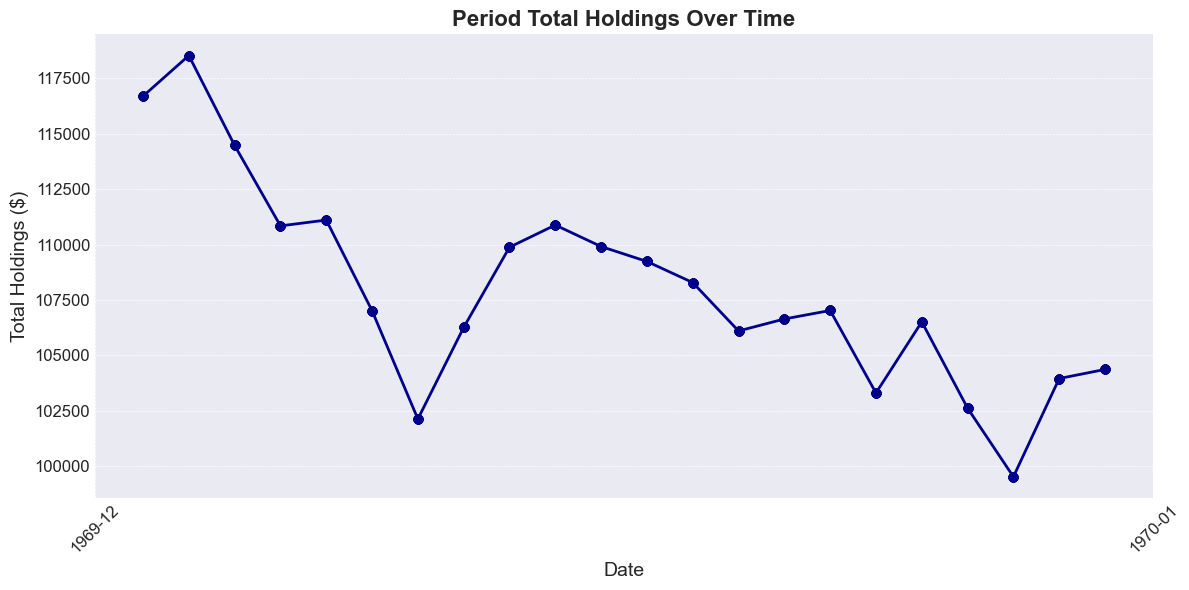

In [22]:
import matplotlib.dates as mdates

# Applying a style
plt.style.use('seaborn-darkgrid')

# Creating a more professional plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['AnalysisEndDate'], df['period_total_holds'], marker='o', linestyle='-', color='darkblue', linewidth=2)

# Adding titles and labels with enhanced font sizes
ax.set_title('Period Total Holdings Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Total Holdings ($)', fontsize=14)

# Formatting date ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adding grid lines and improving tick parameter visibility
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the figure
plt.tight_layout()
plt.show()


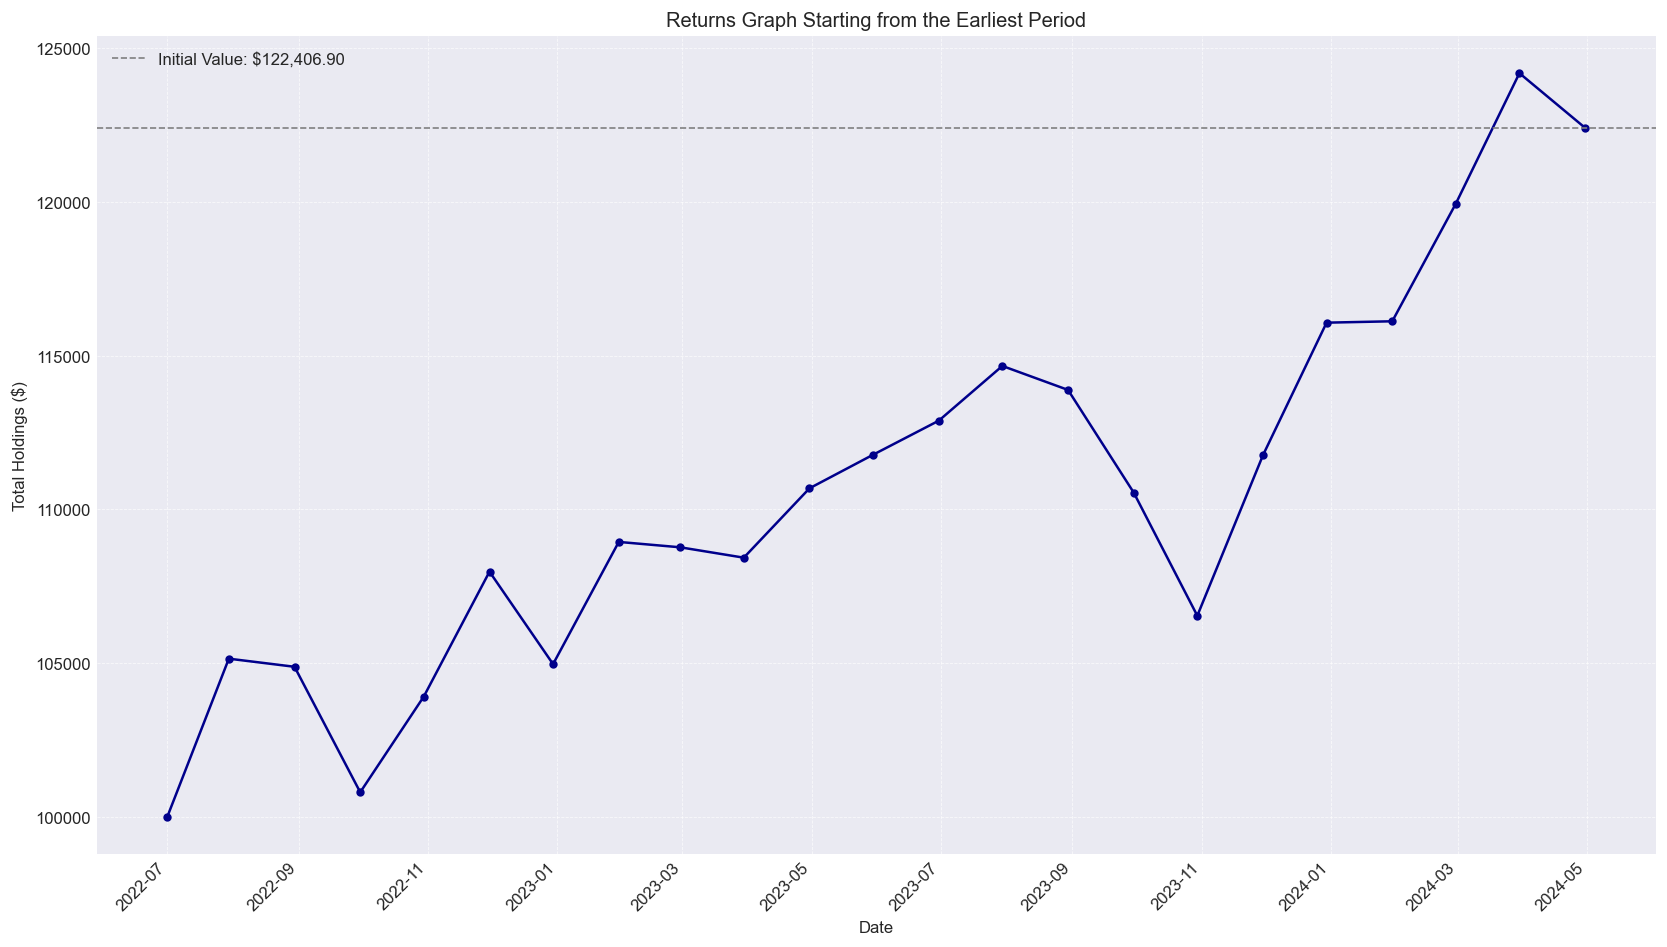

In [23]:
# Reconstructing the DataFrame with user's provided code for sorting by 'period' ascending
data = {
    "AnalysisEndDate": [
        "2024-04-30", "2024-03-30", "2024-02-29", "2024-01-30", "2023-12-30",
        "2023-11-30", "2023-10-30", "2023-09-30", "2023-08-30", "2023-07-30",
        "2023-06-30", "2023-05-30", "2023-04-30", "2023-03-30", "2023-02-28",
        "2023-01-30", "2022-12-30", "2022-11-30", "2022-10-30", "2022-09-30",
        "2022-08-30", "2022-07-30", "2022-07-01"
    ],
    "period_total_holds": [
        122406.90, 124185.74, 119941.92, 116114.10, 116068.91,
        111758.69, 106534.47, 110540.40, 113880.76, 114660.52,
        112879.68, 111772.15, 110680.24, 108423.20, 108760.78,
        108935.77, 104959.83, 107968.28, 103906.20, 100791.78,
        104873.64, 105137.46, 100000.00
    ],
    "period": list(range(22, -1, -1))
}

# Creating DataFrame
df_from_scratch = pd.DataFrame(data)

# Sorting by 'period' ascending
df_from_scratch.sort_values(by='period', ascending=True, inplace=True)
df_from_scratch['AnalysisEndDate'] = pd.to_datetime(df_from_scratch['AnalysisEndDate'])

# Plotting from scratch
plt.figure(figsize=(14, 8), dpi=120)
plt.plot(df_from_scratch['AnalysisEndDate'], df_from_scratch['period_total_holds'], marker='o', markersize=4, linestyle='-', linewidth=1.5, color='darkblue')
plt.axhline(y=df_from_scratch['period_total_holds'].iloc[-1], color='gray', linestyle='--', linewidth=1, label=f'Initial Value: ${df_from_scratch["period_total_holds"].iloc[-1]:,.2f}')

# Improving date readability again
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Total Holdings ($)')
plt.title('Returns Graph Starting from the Earliest Period')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig('Final_Returns_Graph.png')
plt.show()
